# Plotting the Production Possibility Frontier

## Steps

1. Plot production function A and B on first quadrant plots
2. Transform plots into second and fourth quadrant plots, respectively
3. Put it all together

### How are we going to do it?

We first start by creating a generic production function. After plotting it on a regular first quadrant plot (upper right) we have to apply some simple transformations to obtain production functions A and B.

### Production function A
The first production function we will plot will be function A, located in the second quadrant (upper left) of our final plot. Intuitively, we can understand that the points that lay on the original plot have coordinates P = (x; y). To obtain our plot we will mirror the function along the y-axis, thus the new coordinates will become P' = (-x; y).

```
(x; y) -> (-x; y)
```

### Production function B
To obtain function B we will rotate the plot 90 degrees. Thus, the coordinates will intuitively be transformed from P = (x; y) to P' = (y; -x).

```
(x; y) -> (-x; y)
```

# 1. Plotting our generic function

In [11]:
"""
* Import the necessary libraries
"""
import matplotlib.pyplot as plt # used to make the plots
import numpy as np              # used to manage numerical data
import math                     # contains necessary libraries for operations
from scipy.interpolate import  make_interp_spline, interp1d, CubicSpline

Text(0, 0.5, 'Quantity _')

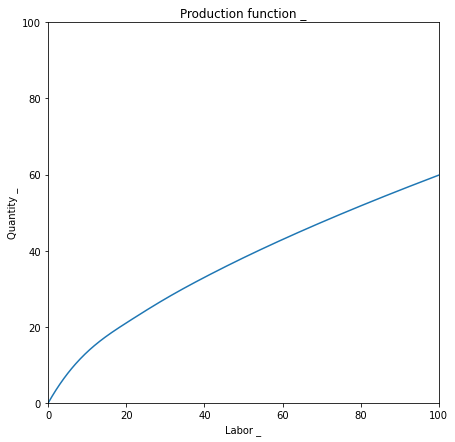

In [3]:
"""
* The function we have chosen is Q(L) = 3 * L ^ 0.65
"""

LABOR_LIM = (0, 100)
QUANTITY_LIM = (0, 100)

plt.figure(figsize=(7, 7))

X = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

y = 3 * np.array(X) ** .65 # * This is the function

X_y_Spline = make_interp_spline(X, y)

X_ = np.linspace(X.min(), X.max(), 500)
y_ = X_y_Spline(X_)

plt.plot(X_, y_)

plt.xlim(LABOR_LIM)
plt.ylim(QUANTITY_LIM)

plt.title("Production function _")
plt.xlabel("Labor _")
plt.ylabel("Quantity _")

# 2. Transform plots

## 2.1 Production function A

Text(0, 0.5, 'Quantity A')

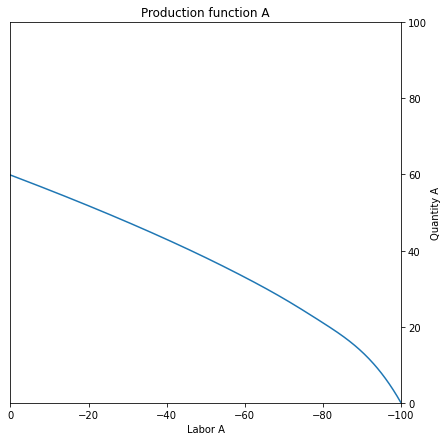

In [4]:
"""
* Plotting production A: (x, y) -> (-x, y)
"""
LABOR_LIM = (0, -100)
QUANTITY_LIM = (0, 100)

plt.figure(figsize=(7, 7))

X = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

y = 3 * np.array(X) ** .65

X = np.array(sorted(-1 * X))

ax=plt.gca()  
ax.set_xlim(ax.get_xlim()[::-1])  
ax.yaxis.tick_right()  
ax.yaxis.set_label_position('right') 

X_y_Spline = make_interp_spline(X, y)

X_ = np.linspace(X.min(), X.max(), 500)
y_ = X_y_Spline(X_)

plt.plot(X_, y_)

plt.xlim(LABOR_LIM)
plt.ylim(QUANTITY_LIM)

plt.title("Production function A")
plt.xlabel("Labor A")
ax.set_ylabel("Quantity A")    

Text(0, 0.5, 'Labor A')

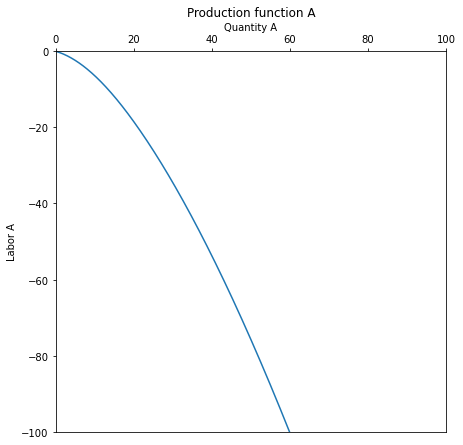

In [5]:
"""
* Plotting production B: (x, y) -> (y, -x)
"""
LABOR_LIM = (-100, 0) # now used as y-axis
QUANTITY_LIM = (0, 100)  # now used as x-axis

plt.figure(figsize=(7, 7))

X = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

y = 3 * np.array(X) ** .65

ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
ax.xaxis.tick_top()                     # and move the X-Axis      
ax.xaxis.set_label_position('top') 
ax.yaxis.tick_left()  

X_y_Spline = make_interp_spline(y, -X)

X_ = np.linspace(X.min(), X.max(), 500)
y_ = X_y_Spline(X_)

plt.plot(X_, y_)

plt.xlim(QUANTITY_LIM)
plt.ylim(LABOR_LIM)

plt.title("Production function A")
ax.set_xlabel("Quantity A")    
plt.ylabel("Labor A")

# 3. Creating our final plot

## 3.1 
Creating the plot is a repetitive and complex task. Not because of the singular complexity of the components of the plot, but because of their overall number, which requires rigorous organization to solve in a timely manner. First off the entire code block will be provided in it's entirety, it will then be split into different blocks, each pertaining to a different aspect of the plot itself.

[ 0.         31.34401762 47.54679577] [ 0.         31.39434148 47.54679577]


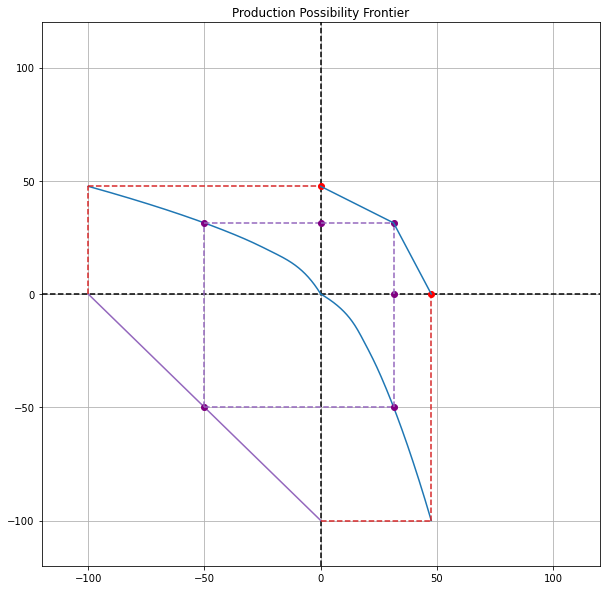

In [24]:
plt.figure(figsize=(10,10)) 

# * Define limits of axes
plt.xlim([-120, 120]) 
plt.ylim([-120, 120]) 


# * Plot x = 0 and y = 0
axis = plt.gca()
plt.plot(axis.get_xlim(),[0,0],'k--') 
plt.plot([0,0],axis.get_ylim(),'k--') 


# * Plot upper left function (prod. func. A)
prodFuncAX = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
prodFuncAY = 3 * np.array(prodFuncAX) ** .6
prodFuncAX = np.array(sorted(-1 * prodFuncAX))
funcA_X_Y_Spline = make_interp_spline(prodFuncAX, prodFuncAY)
prodFuncAX = np.linspace(prodFuncAX.min(), prodFuncAX.max(), 750)
prodFuncAY = funcA_X_Y_Spline(prodFuncAX)
prodFuncAX = prodFuncAX[::-1]

plt.plot(prodFuncAX, prodFuncAY, 'tab:blue')


# * Plot lower right function (prod. func. B)
prodFuncBX = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
prodFuncBY = 3 * np.array(prodFuncBX) ** .6
prodFuncBX = np.array(sorted(-1 * prodFuncBX))
funcB_X_Y_Spline = make_interp_spline(prodFuncBX, prodFuncBY)
prodFuncBX = np.linspace(prodFuncBX.min(), prodFuncBX.max(), 750)
prodFuncBY = funcB_X_Y_Spline(prodFuncBX)
prodFuncBY = prodFuncBY[::-1]

plt.plot(prodFuncBY, prodFuncBX, 'tab:blue')


# * Plot resource constraint
x = [-100, 0]
y = [0, -100]
plt.plot(x, y, 'tab:purple')


# * Plot max points for func. A & B
# func. A:
xForA = [-100, -100]
yForB = [0, prodFuncAY[-1]]
plt.plot(xForA, yForB, 'tab:red', linestyle='--')

xForA = [-100, 0]
yForB = [prodFuncAY[-1], prodFuncAY[-1]]
plt.plot(xForA, yForB, 'tab:red', linestyle='--')

# func. B:
xForB = [0, prodFuncBY[0]]
yForB = [-100, -100]
plt.plot(xForB, yForB, 'tab:red', linestyle='--')

xForB = [prodFuncBY[0], prodFuncBY[0]]
yForB = [-100, 0]
plt.plot(xForB, yForB, 'tab:red', linestyle='--')

# Plot markers:
plt.plot(0, prodFuncAY[-1], marker='o', c='r')
plt.plot(prodFuncBY[0], 0, marker='o', c='r')

# * Plot PPF
# Plot resource constraint point:
plt.plot(-50, -50, marker='o', c='purple')

# Plot on func. A:
ppfAX = [-50, -50]
ppfAY = [-50, prodFuncAY[int(len(prodFuncAY)/2)]]
plt.plot(ppfAX, ppfAY, 'tab:purple', linestyle='--')
plt.plot(-50, prodFuncAY[int(len(prodFuncAY)/2)], marker='o', c='purple')

ppfAX = [-50, 0]
ppfAY = [prodFuncAY[int(len(prodFuncAY)/2)], prodFuncAY[int(len(prodFuncAY)/2)]]
plt.plot(ppfAX, ppfAY, 'tab:purple', linestyle='--')
plt.plot(0, prodFuncAY[int(len(prodFuncAY)/2)], marker='o', c='purple')

# Plot on finc. B:
ppfAX = [-50, prodFuncBY[int(len(prodFuncBY)/2)]]
ppfAY = [-50, -50]
plt.plot(ppfAX, ppfAY, 'tab:purple', linestyle='--')
plt.plot(prodFuncBY[int(len(prodFuncBY)/2)], -50, marker='o', c='purple')

ppfAX = [prodFuncBY[int(len(prodFuncBY)/2)], prodFuncBY[int(len(prodFuncBY)/2)]]
ppfAY = [-50, 0]
plt.plot(ppfAX, ppfAY, 'tab:purple', linestyle='--')
plt.plot(prodFuncBY[int(len(prodFuncBY)/2)], 0, marker='o', c='purple')

# Plot intersection:
INTERSECTION_POINT = [prodFuncBY[int(len(prodFuncBY)/2)], prodFuncAY[int(len(prodFuncAY)/2)]] # for reference

x = [0, prodFuncBY[int(len(prodFuncBY)/2)]]
y = [prodFuncAY[int(len(prodFuncAY)/2)], prodFuncAY[int(len(prodFuncAY)/2)]]
plt.plot(x, y, 'tab:purple', linestyle='--')

x =[prodFuncBY[int(len(prodFuncBY)/2)], prodFuncBY[int(len(prodFuncBY)/2)]]
y =[0, prodFuncAY[int(len(prodFuncAY)/2)]]
plt.plot(x, y, 'tab:purple', linestyle='--')

plt.plot(INTERSECTION_POINT[0], INTERSECTION_POINT[1], marker='o', c='purple')


# * Plot PPF
# ! Need to figure out why smooth curve isn't plotting!!!
A = [0.0, prodFuncAY[int(len(prodFuncAY)-1)]]
B = [prodFuncBY[0], 0.0]

ppfXs = np.array(sorted([A[0], B[0], INTERSECTION_POINT[0]]))
ppfYs = np.array(sorted([A[1], B[1], INTERSECTION_POINT[1]]))
print(ppfXs, ppfYs)

# ppfSpline = make_interp_spline(ppfXs, ppfYs)
# ppfSpilne = interp1d(ppfXs, ppfYs, kind='next')


ppfSpline = CubicSpline(ppfXs, ppfYs)
ppfYs = ppfSpline(ppfXs)

# ppfXs = np.linspace(ppfXs.min(), ppfXs.max(), 1)
# ppfYs = ppfSline(ppfXs)

# ppfXs = np.linspace(ppfXs.min(), ppfXs.max(), 750)
# ppfYs = np.linspace(ppfYs.min(), ppfYs.max(), 750)
# print(ppfXs, ppfYs)

ppfYs = ppfYs[::-1]
plt.plot(ppfXs, ppfYs)


# * Graphical details
plt.title("Production Possibility Frontier")
plt.grid()
plt.show()